In [60]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Customer

In [2]:
df = pd.read_csv('/content/Train.csv')

In [3]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [4]:
df.Segmentation.value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [87]:
train_ratios = [ 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.80, 0.85, 0.9]
bal_split_acc = []
bal_split_roc = []
bal_split_rec = []
bal_split_pre = []
bal_split_f1 = []

split_acc = []
split_aroc = []
split_rec = []
split_pre = []
split_f1 = []

stratify_acc = []
stratify_roc = []
stratify_rec = []
stratify_pre = []
stratify_f1 = []

In [6]:
lencoders = {}

for col in df.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    df[col] = lencoders[col].fit_transform(df[col])

In [7]:
df['Work_Experience'] = df['Work_Experience'].fillna(df['Work_Experience'].mode()[0])
df['Family_Size'] = df['Family_Size'].fillna(df['Family_Size'].mode()[0])

df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

## Random Forest

In [ ]:
tr = 0.9
m = len(df)
classes = df['Segmentation'].unique().tolist()
lens = []

c = 'Segmentation'
for i in range(len(classes)):
    exec(f'df_{i} = df[df[c] == classes[i]]')
    exec(f'm_{i} = len(df_{i})')
    exec(f'lens.append(m_{i})')
m_minority = min(lens)
train_len_per_class = round(m * tr/len(classes))

for i in range(len(classes)):
    exec(f'y_{i} = df_{i}[c]')
    exec(f'X_{i} = df_{i}.drop([c], axis = 1)')
    exec(f'rat_{i} = train_len_per_class/m_{i}')
    exec(f'X_train_{i}, X_test_{i}, y_train_{i}, y_test_{i} = train_test_split(X_{i}, y_{i}, train_size = rat_{i}, random_state = 0)')

X_train = X_train_0
y_train = y_train_0
X_test = X_test_0
y_test = y_test_0

for i in range(1, len(classes)):
  exec(f'X_train = X_train.append(X_train_{i}, ignore_index = True)')
  exec(f'y_train = y_train.append(y_train_{i}, ignore_index = True)')
  exec(f'X_test = X_test.append(X_test_{i}, ignore_index = True)')
  exec(f'y_test = y_test.append(y_test_{i}, ignore_index = True)')

In [ ]:
classifier = RandomForestClassifier()
 
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
bal_split_acc.append(accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
bal_split_pre.append(precision)
recall = recall_score(y_test, y_pred, average='weighted')
bal_split_rec.append(recall)
f1 = f1_score(y_test, y_pred, average='weighted')
bal_split_f1.append(f1)

print("Accuracy = {}".format(accuracy))
print(metrics.classification_report(y_test, y_pred))
print("F1 Score = {}".format(f1))

Accuracy = 0.594059405940594
              precision    recall  f1-score   support

           0       0.36      0.45      0.40       157
           1       0.12      0.35      0.18        43
           2       0.66      0.61      0.63       155
           3       0.86      0.66      0.75       453

    accuracy                           0.59       808
   macro avg       0.50      0.52      0.49       808
weighted avg       0.69      0.59      0.63       808

F1 Score = 0.6288696650107249


In [ ]:
y = df['Segmentation']
X = df.drop(['Segmentation'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 2)#, stratify=y)

classifier = RandomForestClassifier()
 
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
split_acc.append(accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
split_pre.append(precision)
recall = recall_score(y_test, y_pred, average='weighted')
split_rec.append(recall)
f1 = f1_score(y_test, y_pred, average='weighted')
split_f1.append(f1)

print("Accuracy = {}".format(accuracy))
print(metrics.classification_report(y_test, y_pred))
print("Precision = {}".format(precision))
print("Recall = {}".format(recall))
print("F1 Score = {}".format(f1))

Accuracy = 0.5018587360594795
              precision    recall  f1-score   support

           0       0.44      0.41      0.43       212
           1       0.37      0.34      0.35       177
           2       0.51      0.48      0.49       183
           3       0.62      0.73      0.67       235

    accuracy                           0.50       807
   macro avg       0.48      0.49      0.48       807
weighted avg       0.49      0.50      0.50       807

Precision = 0.4926682549192537
Recall = 0.5018587360594795
F1 Score = 0.4955090173368942


In [ ]:
y = df['Segmentation']
X = df.drop(['Segmentation'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 2, stratify=y)

classifier = RandomForestClassifier()
 
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
stratify_acc.append(accuracy)
precision = precision_score(y_test, y_pred, average='weighted')
stratify_pre.append(precision)
recall = recall_score(y_test, y_pred, average='weighted')
stratify_rec.append(recall)
f1 = f1_score(y_test, y_pred, average='weighted')
stratify_f1.append(f1)

print("Accuracy = {}".format(accuracy))
print(metrics.classification_report(y_test, y_pred))
print("Precision = {}".format(precision))
print("Recall = {}".format(recall))
print("F1 Score = {}".format(f1))

Accuracy = 0.5055762081784386
              precision    recall  f1-score   support

           0       0.46      0.50      0.48       197
           1       0.39      0.35      0.37       186
           2       0.49      0.44      0.47       197
           3       0.63      0.70      0.66       227

    accuracy                           0.51       807
   macro avg       0.49      0.50      0.49       807
weighted avg       0.50      0.51      0.50       807

Precision = 0.4999967078755398
Recall = 0.5055762081784386
F1 Score = 0.501563214162122


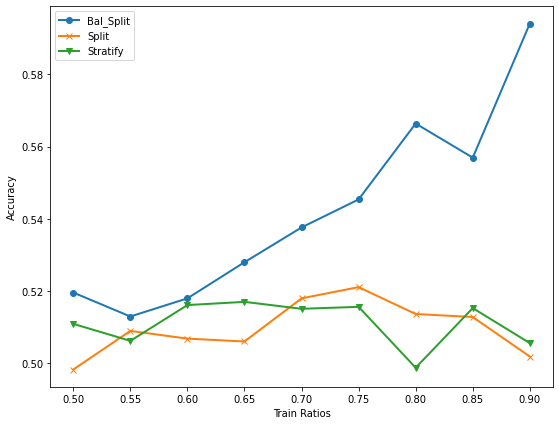

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[9, 7])

ax.plot(train_ratios,
         bal_split_acc,
         marker='o', linewidth=2, label='Bal_Split')
ax.plot(train_ratios,
         split_acc,
         marker='x', linewidth=2, label='Split')
ax.plot(train_ratios,
         stratify_acc,
         marker='v', linewidth=2, label='Stratify')

ax.set_xlabel('Train Ratios')
ax.set_ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
print('bal-spli')
print(bal_split_acc)
print('split')
print(split_acc)
print('strat-split')
print(stratify_acc)

bal-spli
[0.5195738354806739, 0.5129405286343612, 0.5179677819083024, 0.5279745042492918, 0.5376033057851239, 0.5453644025780863, 0.5663771712158809, 0.556930693069307, 0.594059405940594]
split
[0.49826474962816064, 0.5089507022858717, 0.506815365551425, 0.5060198300283286, 0.5179677819083024, 0.5210708973723351, 0.5136307311028501, 0.5127993393889347, 0.5018587360594795]
strat-split
[0.5109072880515617, 0.506196640044065, 0.5161090458488228, 0.5169971671388102, 0.5150764147046675, 0.5156172533465543, 0.49876084262701365, 0.5152766308835673, 0.5055762081784386]


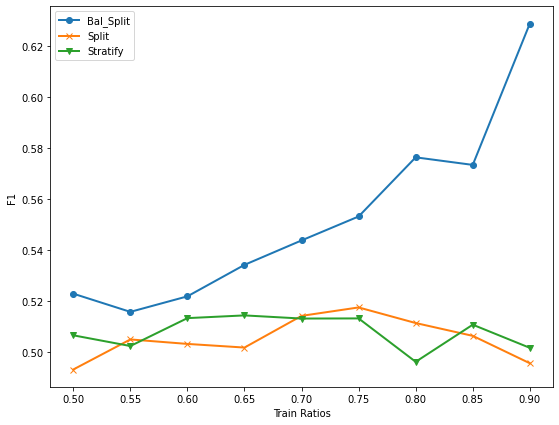

In [ ]:
fig, ax = plt.subplots(figsize=[9, 7])

ax.plot(train_ratios,
         bal_split_f1,
         marker='o', linewidth=2, label='Bal_Split')
ax.plot(train_ratios,
         split_f1,
         marker='x', linewidth=2, label='Split')
ax.plot(train_ratios,
         stratify_f1,
         marker='v', linewidth=2, label='Stratify')


ax.set_xlabel('Train Ratios')
ax.set_ylabel('F1')
plt.legend()
plt.show()

In [ ]:
print('bal-spli')
print(bal_split_f1)
print('split')
print(split_f1)
print('strat-split')
print(stratify_f1)

bal-spli
[0.5228304258468377, 0.5156845553947742, 0.5217797439913329, 0.5341421763976226, 0.5437300782151927, 0.5531356435086021, 0.5763547470996365, 0.5733853058893974, 0.6288696650107249]
split
[0.49305557480900786, 0.5048605241629769, 0.5030994936253113, 0.5016708146680736, 0.5141172865090244, 0.5174250186677126, 0.5113001025546932, 0.5062682085325356, 0.4955090173368942]
strat-split
[0.5064811405680982, 0.5022738808423939, 0.5132271113744598, 0.5142946330007113, 0.513061473370771, 0.5131122860856454, 0.49607950377582477, 0.5106480095005439, 0.501563214162122]


## KNN

In [88]:
tr_rats = [ 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.80, 0.85, 0.9]
for i in tr_rats:  
  tr = i
  m = len(df)
  classes = df['Segmentation'].unique().tolist()
  lens = []

  c = 'Segmentation'
  for i in range(len(classes)):
    exec(f'df_{i} = df[df[c] == classes[i]]')
    exec(f'm_{i} = len(df_{i})')
    exec(f'lens.append(m_{i})')
  m_minority = min(lens)
  train_len_per_class = round(m * tr/len(classes))

  for i in range(len(classes)):
    exec(f'y_{i} = df_{i}[c]')
    exec(f'X_{i} = df_{i}.drop([c], axis = 1)')
    exec(f'rat_{i} = train_len_per_class/m_{i}')
    exec(f'X_train_{i}, X_test_{i}, y_train_{i}, y_test_{i} = train_test_split(X_{i}, y_{i}, train_size = rat_{i}, random_state = 0)')

  X_train = X_train_0
  y_train = y_train_0
  X_test = X_test_0
  y_test = y_test_0

  for i in range(1, len(classes)):
    exec(f'X_train = X_train.append(X_train_{i}, ignore_index = True)')
    exec(f'y_train = y_train.append(y_train_{i}, ignore_index = True)')
    exec(f'X_test = X_test.append(X_test_{i}, ignore_index = True)')
    exec(f'y_test = y_test.append(y_test_{i}, ignore_index = True)')

  from sklearn import metrics

  classifier = KNeighborsClassifier(n_neighbors=3)
 
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  bal_split_acc.append(accuracy)
  precision = precision_score(y_test, y_pred, average='weighted')
  bal_split_pre.append(precision)
  recall = recall_score(y_test, y_pred, average='weighted')
  bal_split_rec.append(recall)
  f1 = f1_score(y_test, y_pred, average='weighted')
  bal_split_f1.append(f1)

In [89]:
len(bal_split_f1)

9

In [93]:
split_acc = []
split_aroc = []
split_rec = []
split_pre = []
split_f1 = []

In [94]:
test_rats = [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1] 
for i in test_rats:
  y = df['Segmentation']
  X = df.drop(['Segmentation'], axis = 1)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, random_state = 2)#, stratify=y)

  classifier = KNeighborsClassifier(n_neighbors=3)
 
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  split_acc.append(accuracy)
  precision = precision_score(y_test, y_pred, average='weighted')
  split_pre.append(precision)
  recall = recall_score(y_test, y_pred, average='weighted')
  split_rec.append(recall)
  f1 = f1_score(y_test, y_pred, average='weighted')
  split_f1.append(f1)

In [91]:
test_rats = [0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1] 
for i in test_rats:
  y = df['Segmentation']
  X = df.drop(['Segmentation'], axis = 1)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, random_state = 2, stratify=y)

  classifier = KNeighborsClassifier(n_neighbors=3)
 
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  stratify_acc.append(accuracy)
  precision = precision_score(y_test, y_pred, average='weighted')
  stratify_pre.append(precision)
  recall = recall_score(y_test, y_pred, average='weighted')
  stratify_rec.append(recall)
  f1 = f1_score(y_test, y_pred, average='weighted')
  stratify_f1.append(f1)

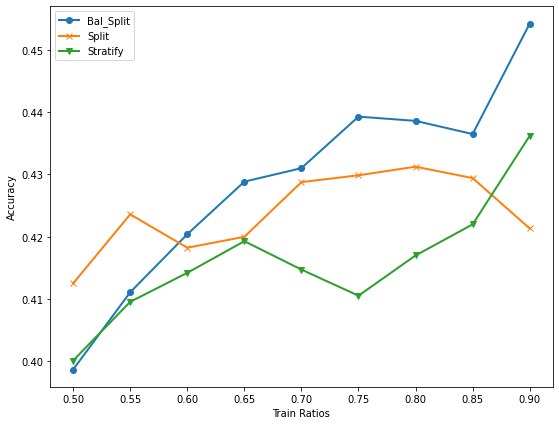

In [95]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=[9, 7])

ax.plot(train_ratios,
         bal_split_acc,
         marker='o', linewidth=2, label='Bal_Split')
ax.plot(train_ratios,
         split_acc,
         marker='x', linewidth=2, label='Split')
ax.plot(train_ratios,
         stratify_acc,
         marker='v', linewidth=2, label='Stratify')

ax.set_xlabel('Train Ratios')
ax.set_ylabel('Accuracy')
plt.legend()
plt.show()

In [101]:
print('split')
print(split_acc)
print('strat-split')
print(stratify_acc)
print('bal-spli')
print(bal_split_acc)

split
[0.41249380267724345, 0.42357477278986505, 0.41821561338289964, 0.419971671388102, 0.42874845105328374, 0.4298463063956371, 0.4312267657992565, 0.42939719240297275, 0.42131350681536556]
strat-split
[0.4000991571641051, 0.4095290553566511, 0.4141883519206939, 0.4192634560906516, 0.4147046674927716, 0.4105106593951413, 0.41697645600991323, 0.42196531791907516, 0.436183395291202]
bal-spli
[0.39866204162537167, 0.411068281938326, 0.42038413878562575, 0.4288243626062323, 0.43099173553719006, 0.4392662369856222, 0.43858560794044665, 0.43646864686468645, 0.4542079207920792]


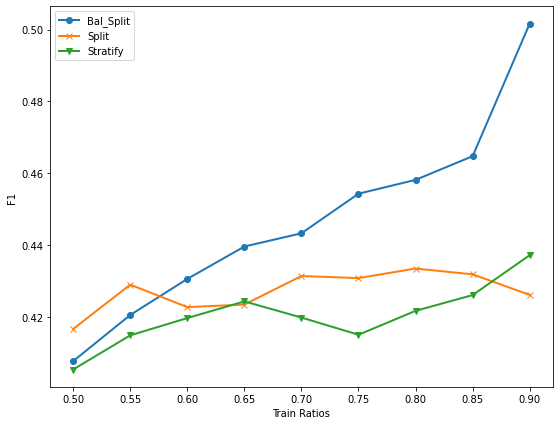

In [97]:
fig, ax = plt.subplots(figsize=[9, 7])

ax.plot(train_ratios,
         bal_split_f1,
         marker='o', linewidth=2, label='Bal_Split')
ax.plot(train_ratios,
         split_f1,
         marker='x', linewidth=2, label='Split')
ax.plot(train_ratios,
         stratify_f1,
         marker='v', linewidth=2, label='Stratify')


ax.set_xlabel('Train Ratios')
ax.set_ylabel('F1')
plt.legend()
plt.show()

In [100]:
print('split')
print(split_f1)
print('strat-split')
print(stratify_f1)
print('bal-spli')
print(bal_split_f1)

split
[0.41676230912608525, 0.4290866749229873, 0.42285348719573984, 0.42356227218506487, 0.43148741705604765, 0.43091872085563615, 0.43357072072612546, 0.43195855782477677, 0.4262410003748032]
strat-split
[0.4055080234751043, 0.41500530383984136, 0.41980204708810503, 0.42443863530433973, 0.4199486226227783, 0.4151679348044115, 0.421811944567625, 0.42619661042661383, 0.43728498563406293]
bal-spli
[0.4078227758870401, 0.42065525222784383, 0.43067884557524105, 0.43968826224020247, 0.44336453818309396, 0.454368717447148, 0.45821477847987613, 0.46479847361281973, 0.5016579534428622]
